# Exploratory Data Analysis (EDA)

In [26]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import numpy as np
import statsmodels.api as sm
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import html5lib

## Importado dados dos 10 primeiros do Indice bovespa
### dados será usados para importar informaçōes gerais dos ultimos 5 anos

In [27]:
dados_ref = pd.read_csv('../dados/dez_primeiros_on_do_index_bovespa')
dados_ref.head(10)

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,VALE3,VALE,ON NM,3.292.010.807,10.941
1,B3SA3,B3,ON NM,2.046.021.644,6.825
2,MGLU3,MAGAZ LUIZA,ON NM,661.834.080,3.141
3,WEGE3,WEG,ON NM,689.271.972,2.539
4,JBSS3,JBS,ON NM,1.620.646.499,2.079
5,SUZB3,SUZANO S.A.,ON NM,725.859.318,2.001
6,NTCO3,GRUPO NATURA,ON NM,706.484.775,1.891
7,LREN3,LOJAS RENNER,ON NM,785.308.019,1.855
8,GNDI3,INTERMEDICA,ON NM,458.380.483,1.746
9,VVAR3,VIAVAREJO,ON NM,1.443.662.628,1.612


In [28]:
Start_Day='26.08.2015'

In [29]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=dt.datetime(S_Year, S_Month, S_Day), end=dt.datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo




df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBRA&idioma=pt-br')
symbols=list(dados_ref['Código'].values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]


today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before =  dt.datetime.strptime(Start_Day,'%d.%m.%Y')

S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year
stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

stocks_close=stocks_all['Adj Close']


#stocks_close=stocks_all['Adj Close'].dropna(axis=0, how='all')
#stocks_close=stocks_close.dropna(axis=1, how='any')

output = None

symbols=list(stocks_close.columns)

for sy in symbols:

    if output is None:
        df = pd.DataFrame(index=stocks_close.index)
        df[sy[:-3]]=stocks_close[sy]
        output = df          

    else:
        df = pd.DataFrame(index=stocks_close.index)
        df[sy[:-3]]=stocks_close[sy]      
        output=pd.concat([output,df],axis=1) 

dados = output
dados.head()


[*********************100%***********************]  10 of 10 completed


,B3SA3,GNDI3,JBSS3,LREN3,MGLU3,NTCO3,SUZB3,VALE3,VVAR3,WEGE3
Date,,,,,,,,,,
2015-08-26,9.279218,NaN,13.040076,15.031753,0.225533,NaN,18.942362,13.891289,7.555686,11.220928
2015-08-27,9.527004,NaN,13.326975,15.409015,0.227216,NaN,18.942362,15.455153,7.655103,11.546843
2015-08-28,9.364663,NaN,13.169643,15.183553,0.223008,NaN,18.942362,15.123158,7.655103,11.609228
2015-08-31,9.210859,NaN,13.095604,14.810743,0.214593,NaN,18.942362,15.656096,7.655103,11.616172
2015-09-01,8.843451,NaN,13.206663,14.401823,0.208702,NaN,18.942362,14.939691,7.655103,11.283319


In [30]:
dados.describe().round(4)

,B3SA3,GNDI3,JBSS3,LREN3,MGLU3,NTCO3,SUZB3,VALE3,VVAR3,WEGE3
count,1243.0000,580.0000,1243.0000,1243.0000,1243.0000,170.0000,1243.0000,1243.0000,1243.0000,1243.0000
mean,25.8553,43.3728,14.0183,29.9570,17.9992,39.9957,28.9942,35.7392,6.1365,19.6195
std,13.2472,16.8369,6.6880,12.0302,20.8110,7.2780,10.7403,15.3284,3.7656,11.8341
min,8.7153,19.8352,5.8129,12.1195,0.0824,21.2500,17.0319,7.6645,1.0737,9.0602
25%,16.3587,27.0962,9.2003,19.7126,1.0272,35.0800,19.2894,23.2899,3.4877,11.8933
50%,21.7538,40.7993,11.0460,28.7432,10.4284,40.7200,20.8979,39.7628,5.1100,16.8049
75%,33.3112,58.9940,19.8608,38.8872,23.8431,45.9325,38.8700,49.1136,7.6112,19.1003
max,67.4000,76.0676,32.4497,59.9769,90.1500,51.4300,53.2506,63.0600,21.2900,69.9500


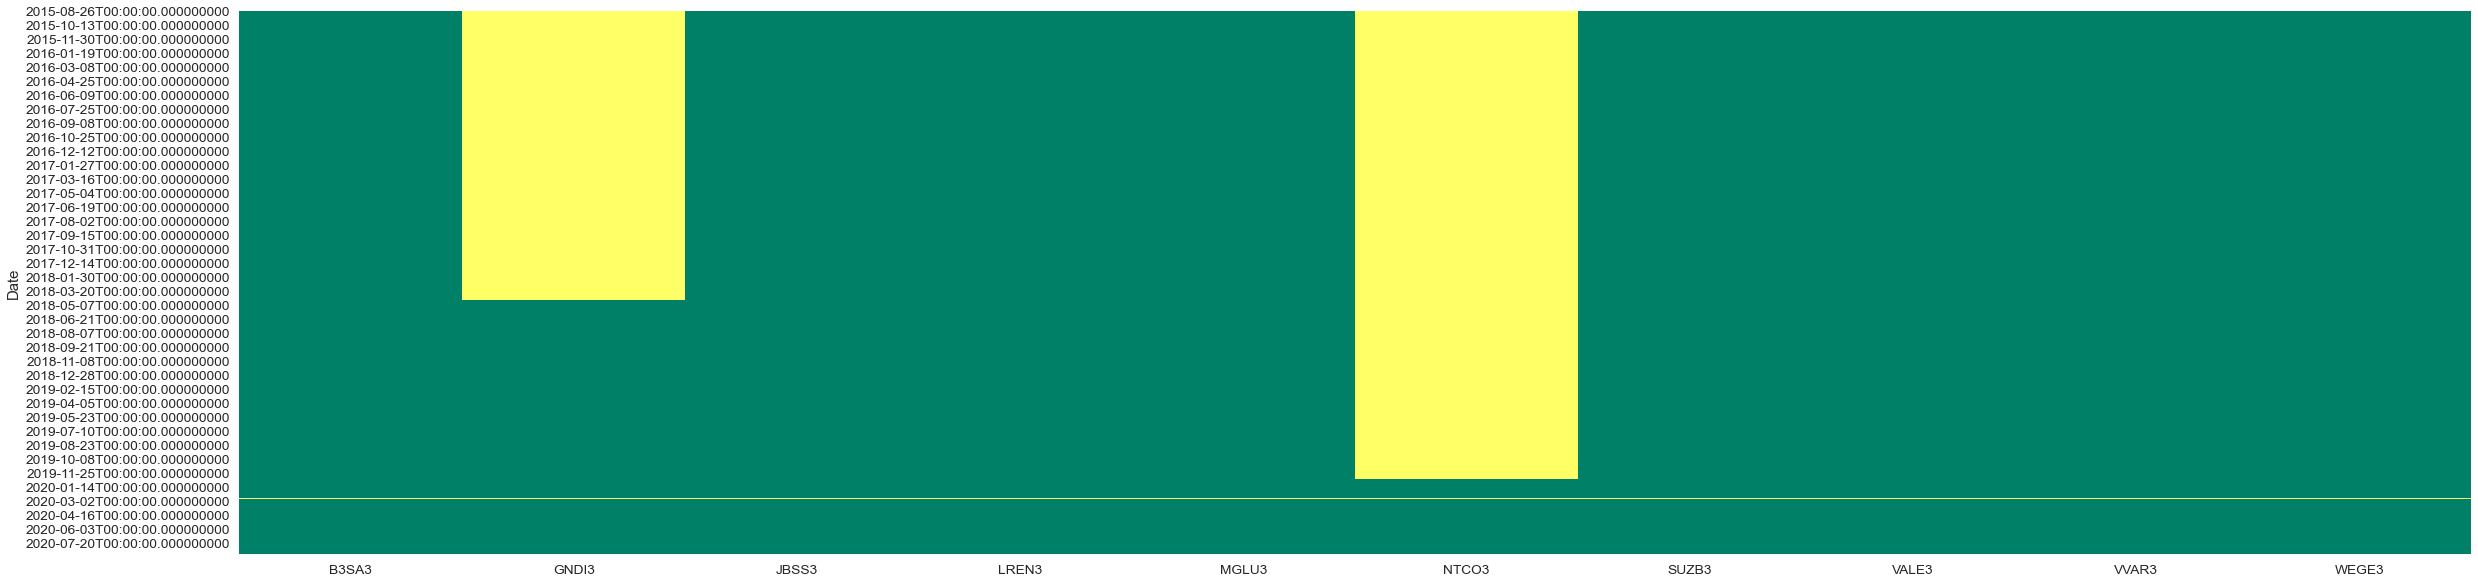

In [31]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(dados.isnull(),  cbar=False, cmap = 'summer')

### Observando os que apresentaram NAN

In [32]:
# Primeiro o GNDI3
GNDI3 = pd.DataFrame(dados['GNDI3'])
GNDI3 = GNDI3.dropna(axis=0, how='all')
GNDI3 = GNDI3.dropna(axis=1, how='any')
GNDI3.head()

,GNDI3
Date,
2018-04-23,20.083204
2018-04-24,20.450125
2018-04-25,19.835218
2018-04-26,20.033607
2018-04-27,20.460045


In [33]:
GNDI3.describe()

,GNDI3
count,580.000000
mean,43.372783
std,16.836882
min,19.835218
25%,27.096204
50%,40.799261
75%,58.993998
max,76.067604


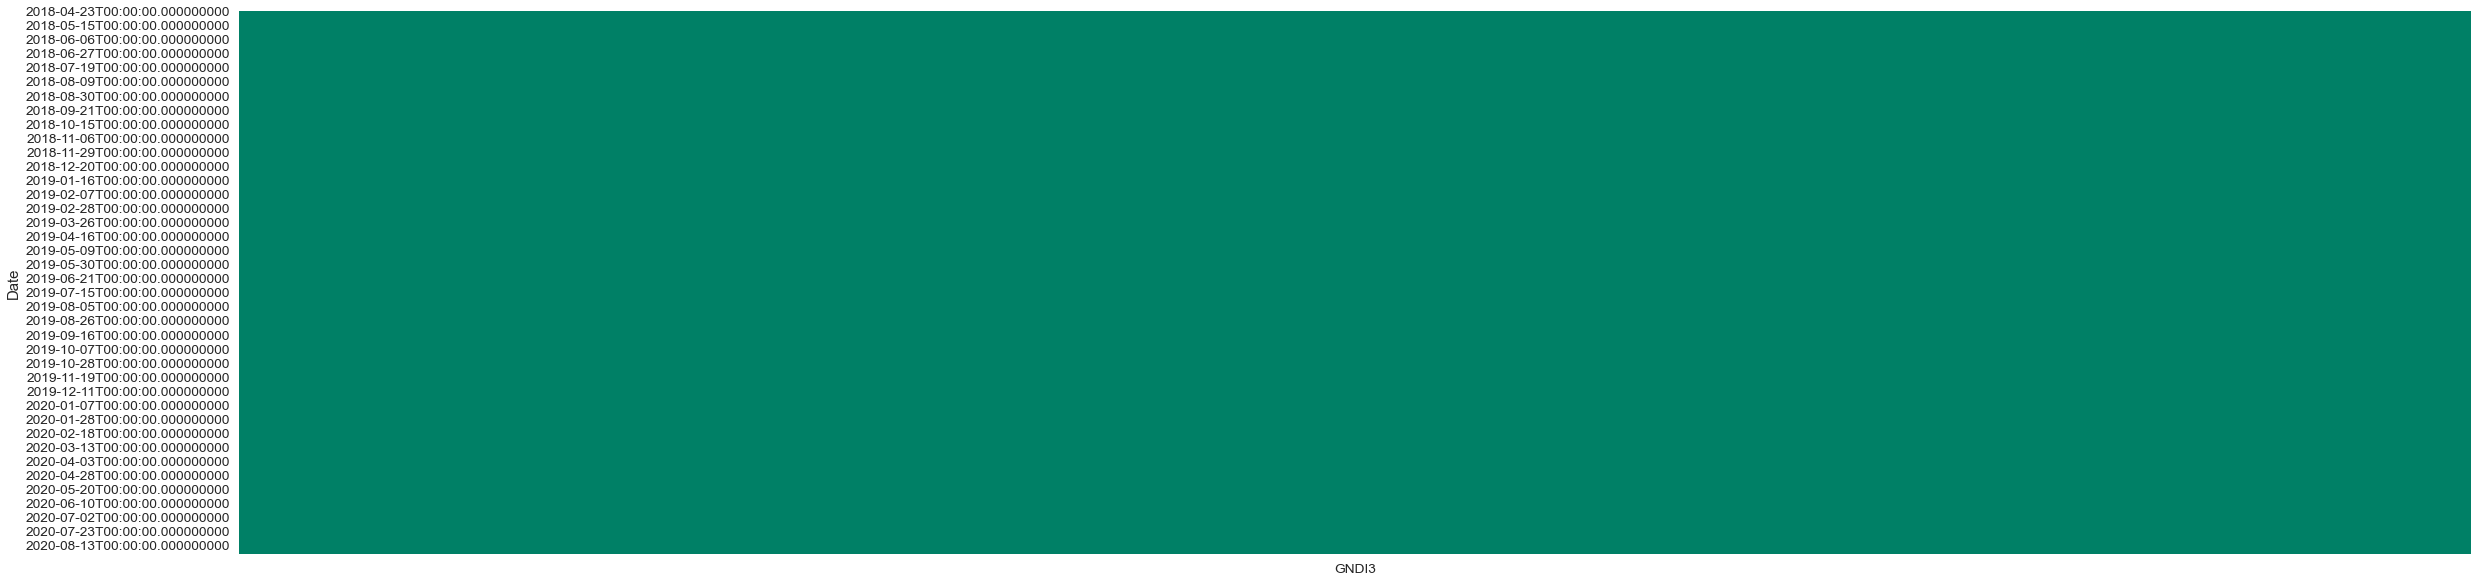

In [34]:
plt.figure(figsize=(40,10))
sns.heatmap(GNDI3.isnull(),  cbar=False, cmap = 'summer')

In [35]:
# Primeiro o NTCO3
NTCO3 = pd.DataFrame(dados['NTCO3'])
NTCO3 = NTCO3.dropna(axis=0, how='all')
NTCO3 = NTCO3.dropna(axis=1, how='any')
NTCO3.head()

,NTCO3
Date,
2019-12-18,36.745049
2019-12-19,38.834198
2019-12-20,39.024124
2019-12-23,39.833794
2019-12-26,39.423958


In [36]:
NTCO3.describe()

,NTCO3
count,170.000000
mean,39.995702
std,7.278049
min,21.250000
25%,35.080001
50%,40.719999
75%,45.932501
max,51.430000


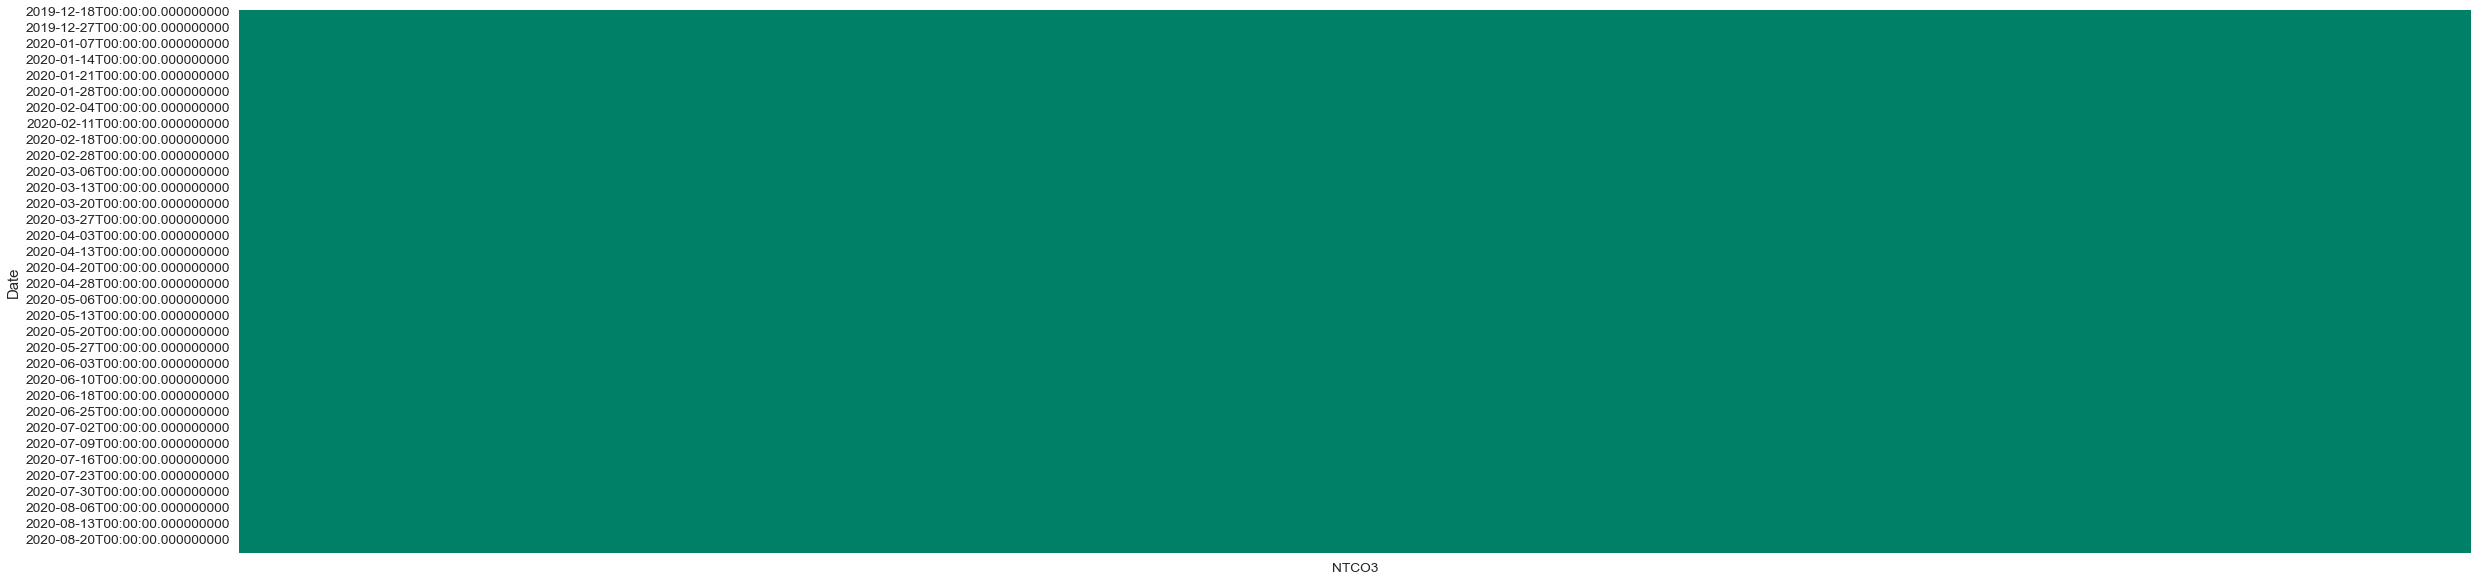

In [37]:
plt.figure(figsize=(40,10))
sns.heatmap(NTCO3.isnull(),  cbar=False, cmap = 'summer')

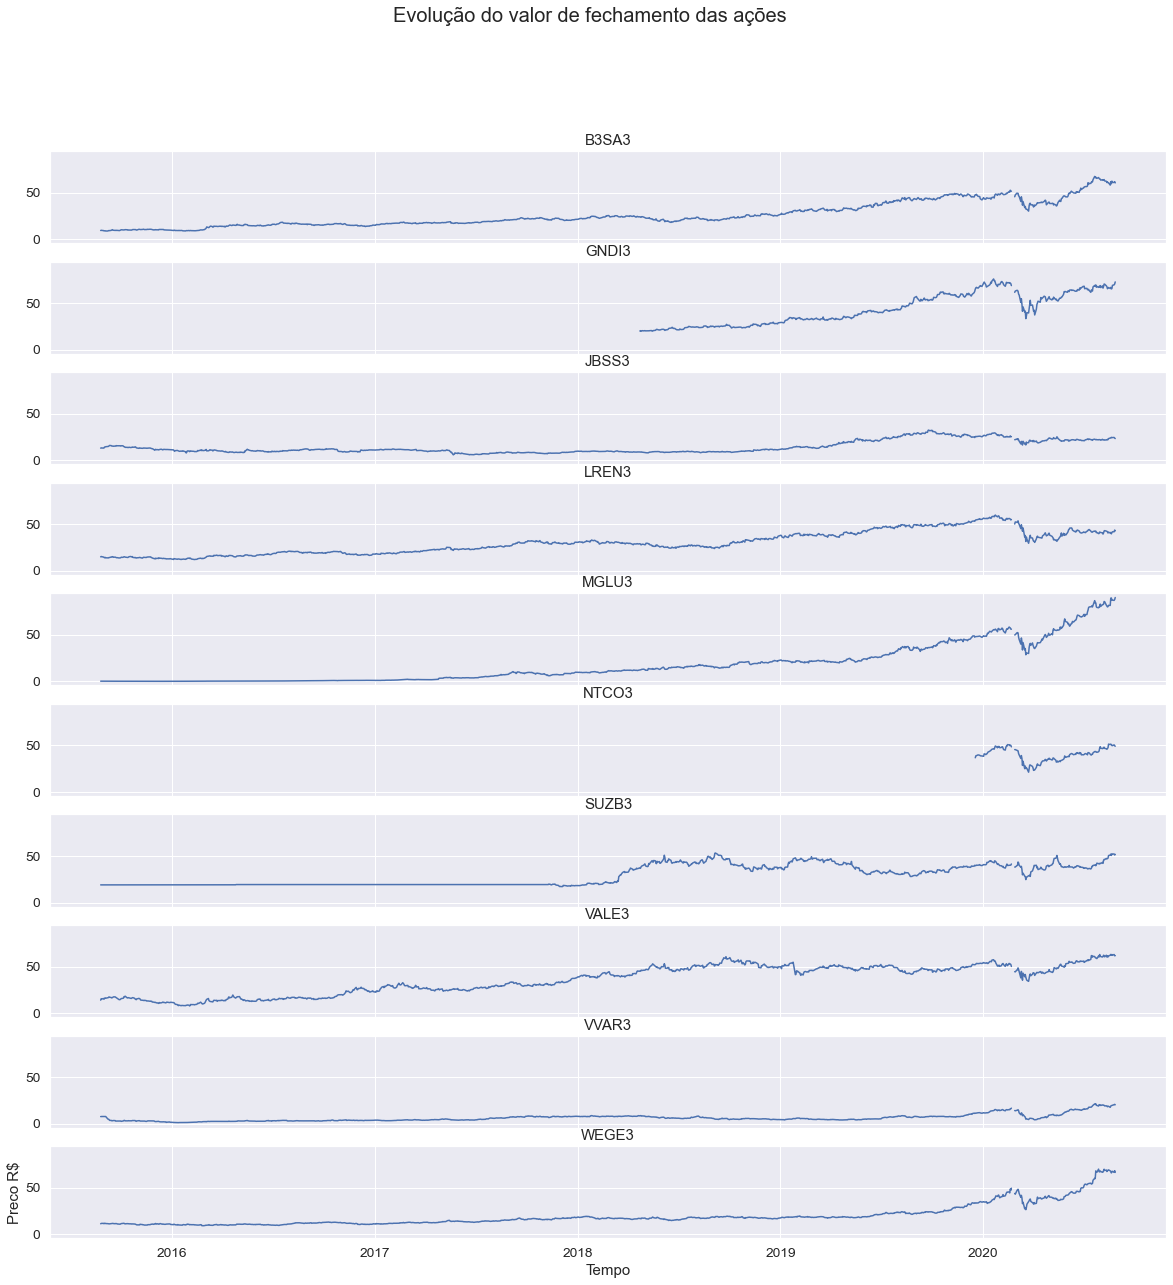

In [38]:
fig,axs = plt.subplots(10, 1,figsize=(20,20),sharex=True, sharey=True)

for i in range(10):
    axs[i].plot(dados[dados.columns[i]])
    axs[i].set_title(str(dados.columns[i]))
    fig.suptitle('Evolução do valor de fechamento das açōes', fontsize=20)
    
plt.xlabel('Tempo',fontsize=15)
plt.ylabel('Preco R$',fontsize=15)
plt.show()


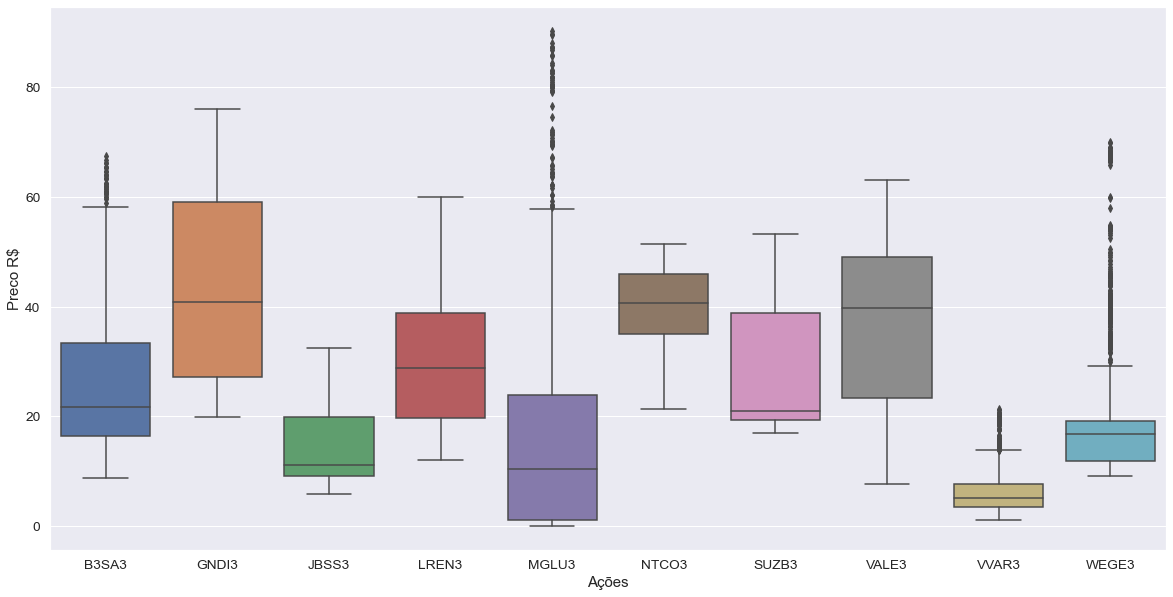

In [39]:
plt.figure(figsize = (20,10))
sns.boxplot(data = dados)

plt.xlabel('Açōes',fontsize=15)
plt.ylabel('Preco R$',fontsize=15)
plt.show()

In [40]:
dados_corr=dados.corr()
dados_corr.round(4)

,B3SA3,GNDI3,JBSS3,LREN3,MGLU3,NTCO3,SUZB3,VALE3,VVAR3,WEGE3
B3SA3,1.0000,0.9375,0.8194,0.9055,0.9624,0.7290,0.6476,0.7808,0.8329,0.8984
GNDI3,0.9375,1.0000,0.8626,0.8175,0.9071,0.9028,-0.2191,0.2082,0.7701,0.8078
JBSS3,0.8194,0.8626,1.0000,0.7905,0.7800,0.6236,0.4580,0.4989,0.5330,0.6579
LREN3,0.9055,0.8175,0.7905,1.0000,0.8153,0.6589,0.6430,0.8075,0.6917,0.6923
MGLU3,0.9624,0.9071,0.7800,0.8153,1.0000,0.6616,0.6868,0.7613,0.8671,0.9576
NTCO3,0.7290,0.9028,0.6236,0.6589,0.6616,1.0000,0.6064,0.7623,0.8576,0.6058
SUZB3,0.6476,-0.2191,0.4580,0.6430,0.6868,0.6064,1.0000,0.8592,0.5080,0.5857
VALE3,0.7808,0.2082,0.4989,0.8075,0.7613,0.7623,0.8592,1.0000,0.6775,0.6675
VVAR3,0.8329,0.7701,0.5330,0.6917,0.8671,0.8576,0.5080,0.6775,1.0000,0.9070
WEGE3,0.8984,0.8078,0.6579,0.6923,0.9576,0.6058,0.5857,0.6675,0.9070,1.0000


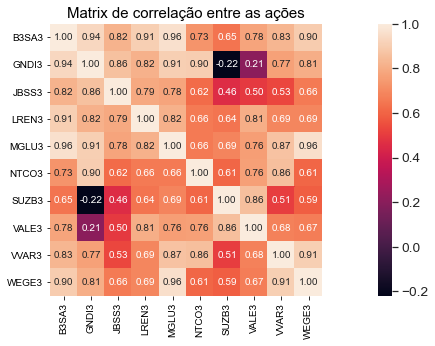

In [16]:
fig = plt.subplots(figsize=(20,5))
sns.set(font_scale=1.25)
hm = sns.heatmap(dados_corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Matrix de correlação entre as açōes')
plt.show()


# Funçōes do professor

In [17]:
class report(object):
    def grafic_01(output,ativo):
            fig=plt.figure(figsize=(20,5));
            stock_return = output[ativo].pct_change()
            vol=100*stock_return.rolling(12).std() * np.sqrt(12)
            ax=vol.plot(x_compat=True,style='m',label='Volatilidade', title=ativo);
            plt.ylabel("Volatilidade [%]")
            output[ativo].plot(x_compat=True, secondary_y=True, style='y--',label='Volume');
            ax.right_ax.set_ylabel('Preço')
            fig.tight_layout()
            plt.grid(False)
            return vol
            pass
    def grafic_02(output,ativo):
            fig=plt.figure(figsize=(20,5));
            ax = fig.add_subplot(111)
            stock_return=100*output[ativo].pct_change()
            stock_return.hist(bins=len(output), color='c')
            plt.axvline(stock_return.mean(), color='k', linestyle='dashed', linewidth=2)            
            plt.title(ativo+': RMD = '+str(round(stock_return.mean(),2))+'% e '+'SMD = '
                      +str(round(stock_return.std(),2))+'%',fontsize=16)  
            ax.grid(False)
            ax.set_xlabel("Retorno Diário [%]", fontsize=12)
            ax.set_ylabel("No de Eventos", fontsize=12)
            fig.tight_layout()
            pass
    def grafic_03(output,ativo1,ativo2):
            ativo1_close_return=100*output[ativo1].pct_change().dropna()
            ativo2_close_return=100*output[ativo2].pct_change().dropna()        
            X = ativo1_close_return
            X = sm.add_constant(X)
            y = ativo2_close_return
            model = sm.OLS(y,X).fit()
            beta = model.params[1]
            alpha = model.params[0]
            fig, ax1 = plt.subplots(1,figsize=(5,5))
            ax1.scatter(X[X.columns[1]],y,label="Retorno Diário", color='blue', edgecolors='none', alpha=0.7)
            X_prime_0 = np.linspace(X[X.columns[1]].min(),X[X.columns[1]].max(), 100)
            X_prime = sm.add_constant(X_prime_0)
            y_hat = model.predict(X_prime)
            ax1.scatter(X_prime_0,y_hat,label="Retorno Diário", color='red', edgecolors='none', alpha=0.5)
            ax1.grid(True)
            ax1.set_xlabel("Retorno Diário "+ativo1+" [%]",fontsize=16)
            ax1.set_ylabel("Retorno Diário "+ativo2+" [%]", fontsize=16)
            ax1.set_title("Alpha = "+str(round(alpha,2))+", Beta = "+str(round(beta,2)), fontsize=16)
            pass
    def grafic_04(output):
            fig = plt.figure(figsize=(20, 5))
            ax = fig.add_subplot(111)
            bp = ax.boxplot(output.values)
            pass
    def grafic_05(output):
            sns.pairplot(output)
            pass

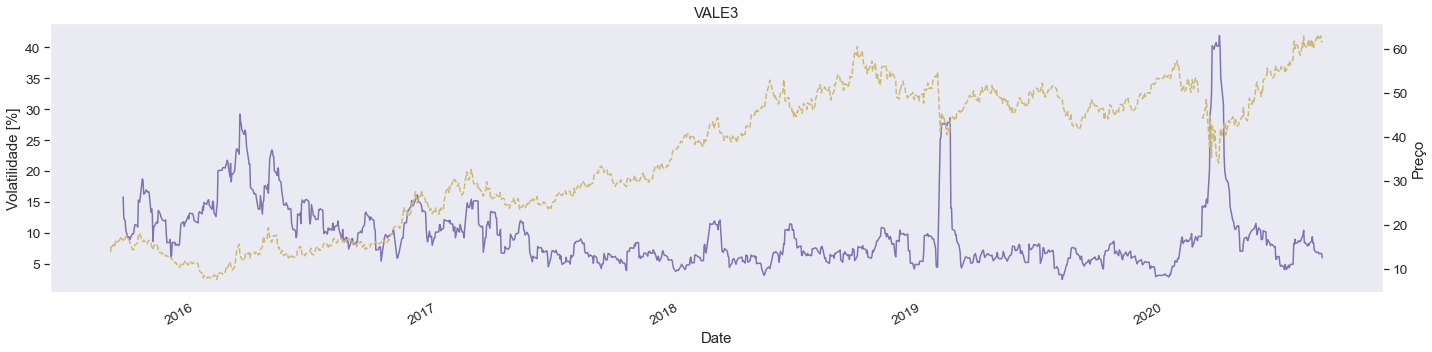

In [41]:
volatilidade_vale = report.grafic_01(dados,'VALE3')

In [45]:
volatilidade_vale = pd.DataFrame(volatilidade_vale)
volatilidade_vale = volatilidade_vale.dropna(axis=0, how='all')
volatilidade_vale = volatilidade_vale.dropna(axis=1, how='any')
selecao =  (volatilidade_vale.to_numpy() > 30)
vol_acima_de_30 = volatilidade_vale[selecao]
selecao = vol_acima_de_30.index
preco_com_vol_acima_de_30 = dados.VALE3[selecao]
vol_acima_de_30['preco'] = preco_com_vol_acima_de_30
mapa = {
    "VALE3": "Volatilidade",
    "preco":"Preço"
}
vol_acima_de_30 = vol_acima_de_30.rename(columns = mapa)

vol_acima_de_30


,Volatilidade,Preço
Date,,
2020-03-11,30.314960,40.740002
2020-03-12,32.414051,35.349998
2020-03-13,40.273115,42.900002
2020-03-16,39.675540,39.040001
2020-03-17,40.260283,41.509998
2020-03-18,40.481257,38.650002
2020-03-19,40.758268,36.400002
2020-03-20,40.221449,35.189999
2020-03-23,40.206075,34.099998


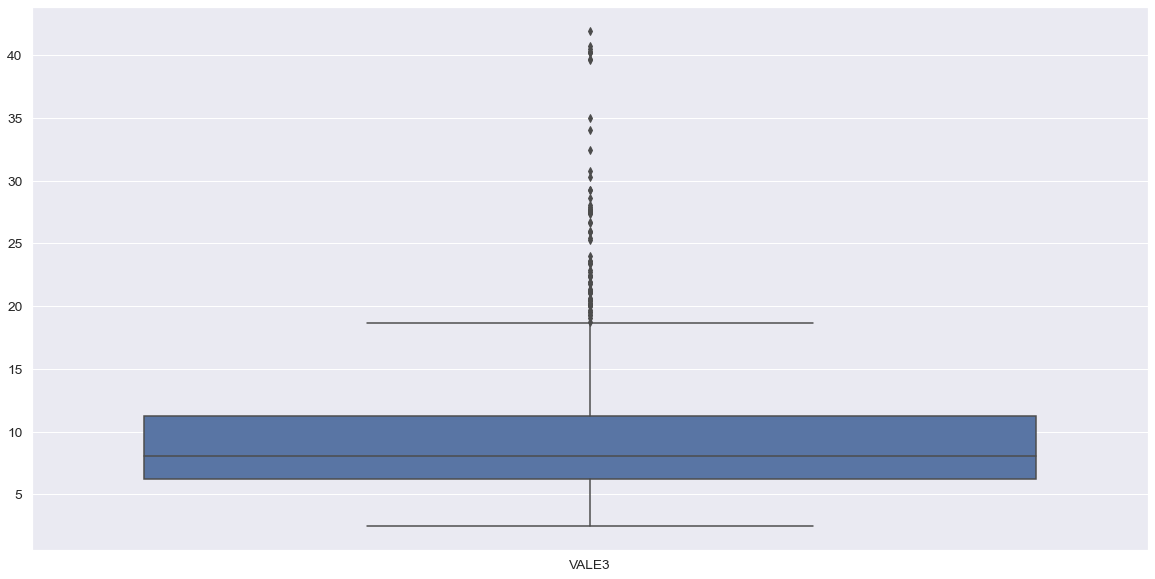

In [48]:
plt.figure(figsize = (20,10))
sns.boxplot(data = volatilidade_vale)

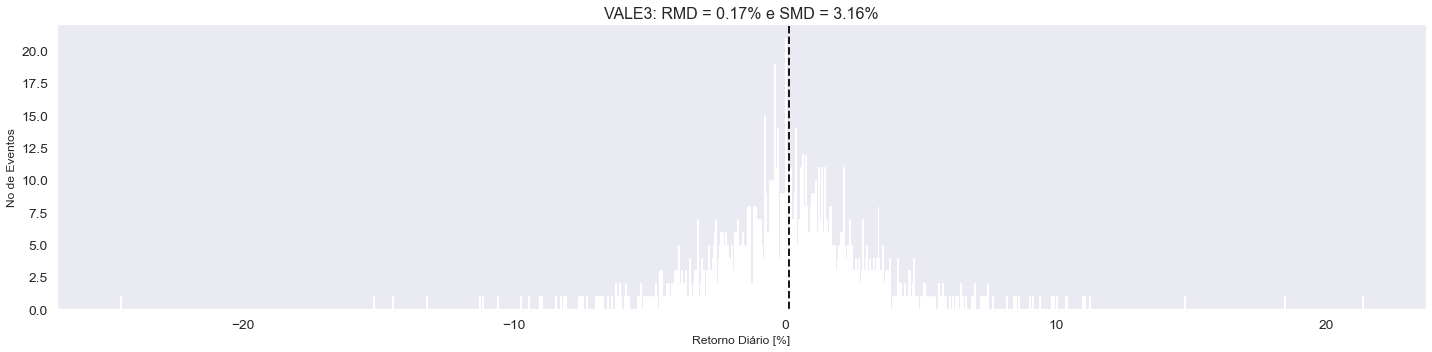

In [49]:
report.grafic_02(dados,'VALE3')

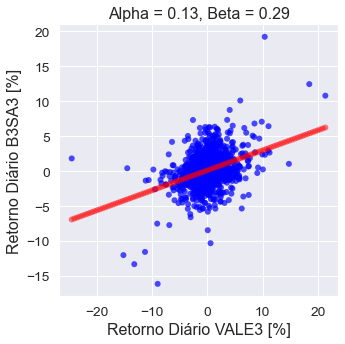

In [23]:
report.grafic_03(dados,'VALE3','B3SA3')

# Importando dados de csv enviado pelo profesor

In [24]:
# Possibilidades
# ABEV3.sa.daily; AZUL4.sa.daily; BIDI4.sa.daily; ITSA4.sa.daily; PETR4.sa.daily; WEGE3.sa.daily
dados = pd.read_csv('../dados/PETR4.sa.daily.csv')
dados

,date,open,high,low,close,vol
0,18/12/2009,28.74,28.82,28.26,28.34,5.948541e+08
1,21/12/2009,28.67,28.71,27.42,27.42,7.586401e+08
2,22/12/2009,27.84,28.31,27.73,28.31,5.403895e+08
3,23/12/2009,28.44,28.64,28.16,28.59,4.021121e+08
4,28/12/2009,28.75,28.82,28.54,28.63,3.346560e+08
...,...,...,...,...,...,...
2466,10/12/2019,30.10,30.44,29.90,30.44,8.329329e+08
2467,11/12/2019,30.51,30.71,30.26,30.40,1.170708e+09
2468,12/12/2019,30.64,31.05,30.48,30.97,1.471464e+09
2469,13/12/2019,30.89,30.97,29.87,29.98,3.172882e+09


In [25]:
dados.describe().round(4)

,open,high,low,close,vol
count,2471.0000,2471.0000,2471.0000,2471.0000,2.471000e+03
mean,17.3344,17.5797,17.0668,17.3069,7.495353e+08
std,5.7620,5.7910,5.7194,5.7531,5.364598e+08
min,3.9900,4.0600,3.9100,3.9900,6.272421e+07
25%,13.5800,13.7900,13.3100,13.5150,4.250524e+08
50%,16.9300,17.2100,16.7300,16.9300,5.808021e+08
75%,20.9750,21.3050,20.7050,21.0000,8.840025e+08
max,30.8900,31.0600,30.4800,30.9700,5.933781e+09
